### 5.4 中心極限定理のデモ

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm
import random
import japanize_matplotlib

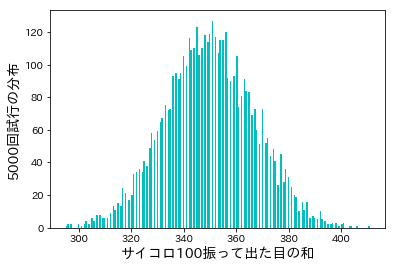

In [2]:
# 実験条件設定
sample_num = 100   # サイコロを振る回数（=1試行）
repeat = 5000      # 試行回数

trial_array = []
dice = np.array(range(1,7))

for i in range(repeat): #　以下をrepeat回繰り返す
    # サイコロをsample_num回振る
    d = random.choices(dice, k=sample_num) #復元抽出
    # 出た目の和
    sum_1sample = np.sum(d)
    trial_array.append(sum_1sample)

# ヒストグラムの表示
plt.xlabel('サイコロ100振って出た目の和', fontsize=14)
plt.ylabel('5000回試行の分布', fontsize=14);
plt.hist(trial_array, bins=200, facecolor='c');

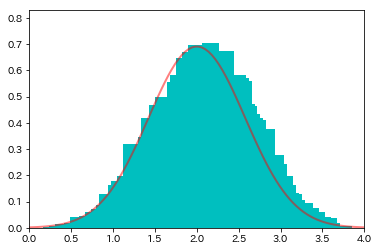

In [3]:
rand_rep = 10000  #生成する[0,1]範囲の一様乱数の数
sum_num = 4       #加える独立な乱数の数
R = np.zeros(rand_rep)

for k in range(sum_num):
    R += np.random.rand(rand_rep)

plt.hist(R, bins=100, width=0.2, density=True, facecolor='c')

x = np.linspace(0, sum_num, 100)
curve = norm.pdf(x, loc=sum_num/2, scale=np.sqrt(sum_num/12))
# loc=平均値、scale=分散を指定している
# [a,b]の一様分布の平均と分散が、それぞれ(a+b)/2, (b-a)^2/12であることを利用

plt.plot(x, curve,lw=2, color="r", alpha=0.5)
plt.axis([0, sum_num, 0, np.max(curve)*1.2]);  #[X軸最小値, X軸最大値, Y軸最小値, Y軸最大値]

以上の2例は元分布が一様分布の場合で、比較的早く正規分布に近づく。
もっと変な分布を作って中心極限定理の確認をしてみる。

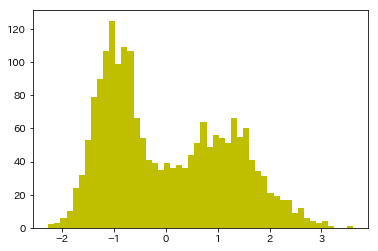

In [4]:
x_total = np.zeros(2000)
x1 = normal(-1,0.4, 1000)
x2 = normal(1, 0.8, 1000)
x_total = np.hstack((x1, x2))

plt.hist(x_total, bins=50, facecolor='y');

### 上の分布から抽出される標本(n=50)の和を5000回取って分布を表示

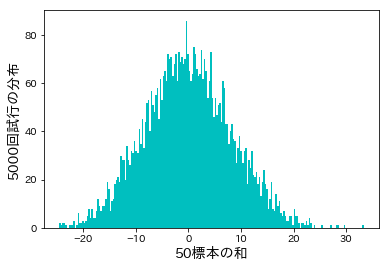

In [5]:
sample_num = 50
repeat = 5000
trial_array = []

for i in range(repeat): #　以下を（分布作成のため）repeat回繰り返す
    # 確率関数の設定
    x1 = normal(-1,0.4, 1000)
    x2 = normal(1, 0.8, 1000)
    x = np.hstack((x1, x2))
    # sample_num点の標本を抽出
    d = random.choices(x, k=sample_num) #復元抽出
    # sample_num個の確率変数の和を求める
    sum_1sample=np.sum(d)
    # 和を配列に格納
    trial_array.append(sum_1sample)

# 確率変数の和のヒストグラムを表示
plt.xlabel('50標本の和', fontsize=14)
plt.ylabel('5000回試行の分布', fontsize=14);
plt.hist(trial_array, bins=200, facecolor='c');